In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

tf.get_logger().setLevel('ERROR')


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'dataset\\train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model
model = Sequential([
    Conv2D(64, kernel_size=(5, 5), activation='relu',
           input_shape=X_train.shape[1:]),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(43, activation='softmax'),
])


In [4]:
# Compilation of the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.build(input_shape=X_train.shape)


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [6]:
epochs = 12
history = model.fit(X_train, y_train, batch_size=512,
                    epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/12


ValueError: in user code:

    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\serik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 43) and (None, 5, 5, 43) are incompatible


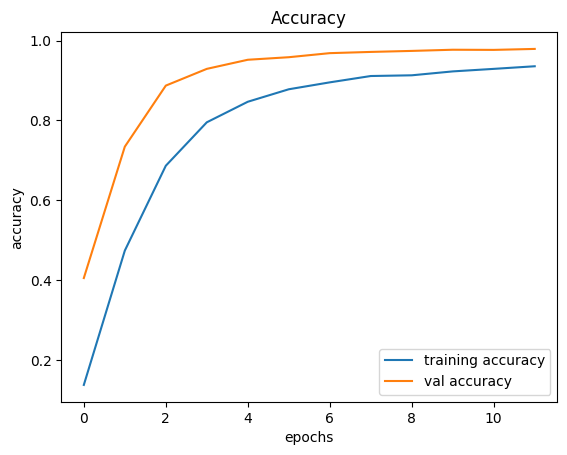

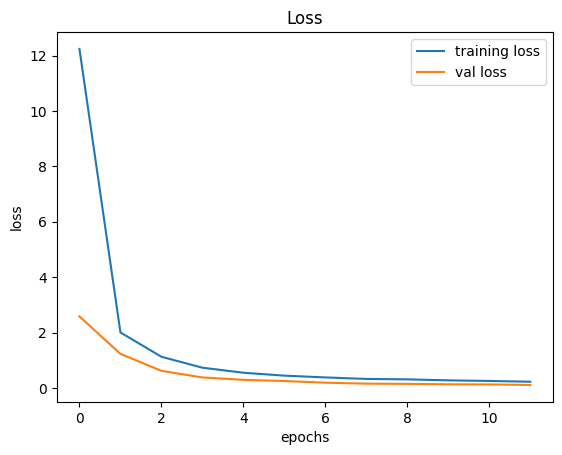

In [ ]:
# plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('dataset\\Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data = []

for img in imgs:
    image = Image.open('dataset\\' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)
pred = model.predict(X_test)


395/395 [==============================] - 2s 4ms/step


In [ ]:
decoded = []
for i in range(pred.shape[0]):
    decoded.append(pred[i, :].argmax())


In [ ]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
print("Accuracy - ", accuracy_score(labels, decoded))


Accuracy -  0.9327790973871734
